<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/Principal_Analysis_Component.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/wine.csv")

In [ ]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
val = {}

for i in df.columns:
  val[i] = df[i].unique()

for col, value_count in val.items():
  print(f"Value Counts for Column '{col}':")
  print(value_count)
  print()


Value Counts for Column 'Type':
[1 2 3]

Value Counts for Column 'Alcohol':
[14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]

Value Counts for Column 'Malic':
[1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1

In [ ]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


For: Type


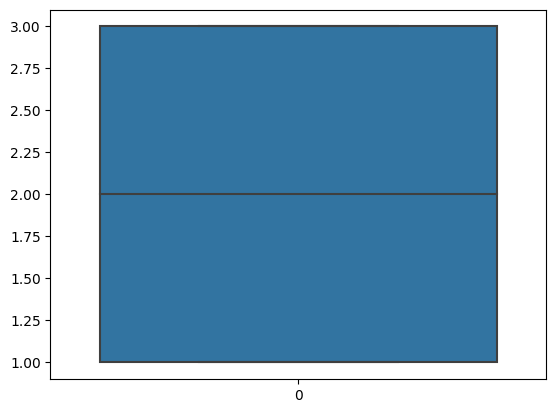

For: Alcohol


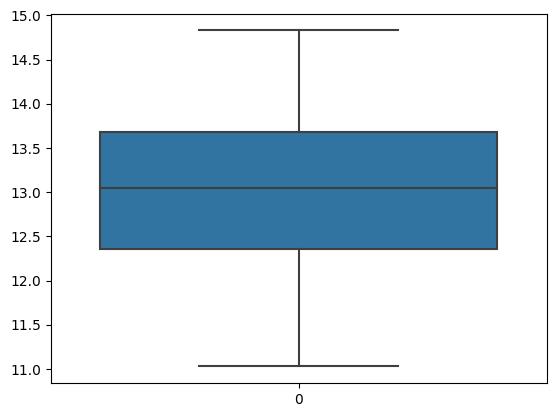

For: Malic


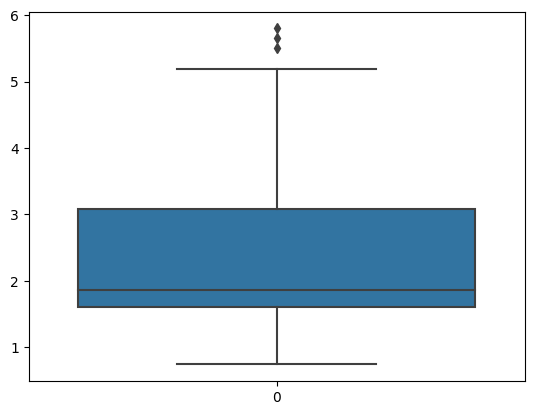

For: Ash


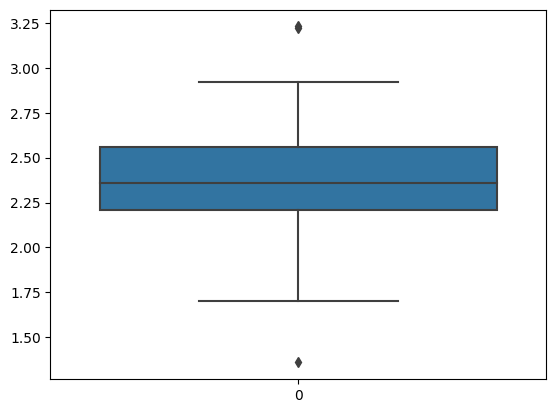

For: Alcalinity


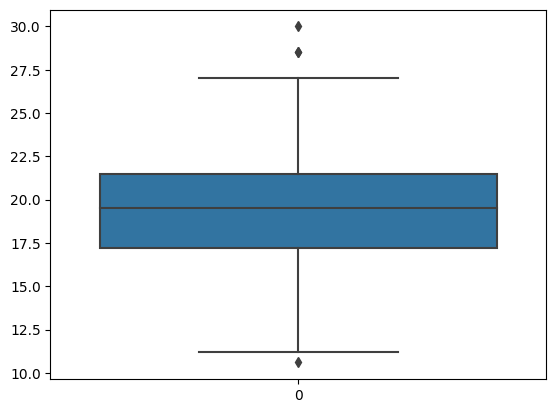

For: Magnesium


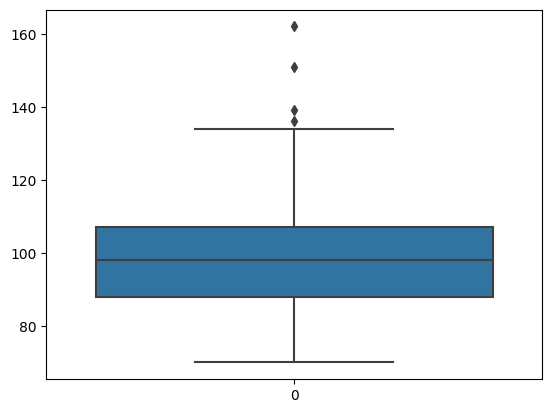

For: Phenols


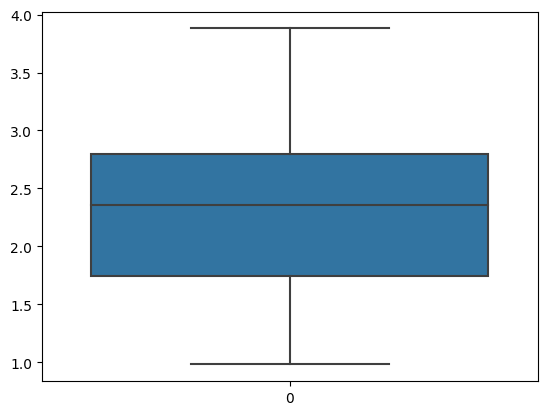

For: Flavanoids


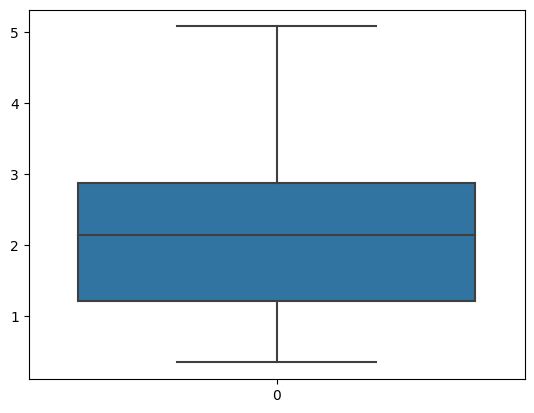

For: Nonflavanoids


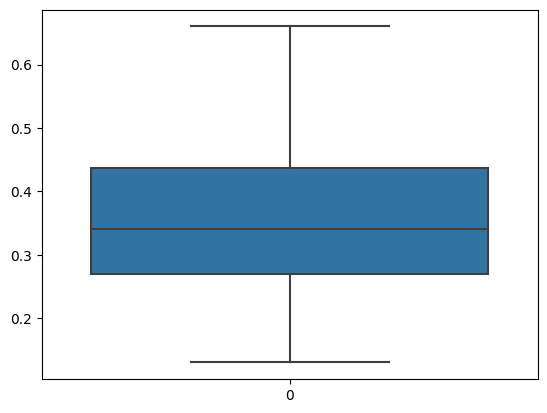

For: Proanthocyanins


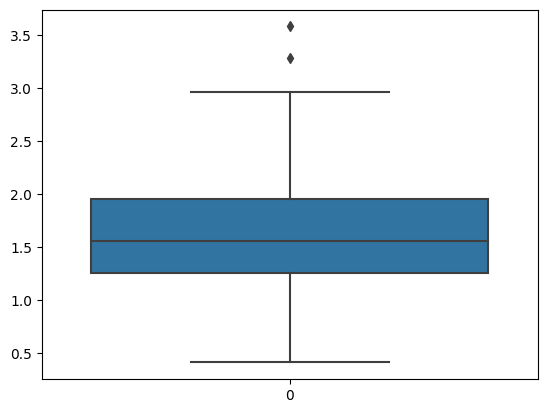

For: Color


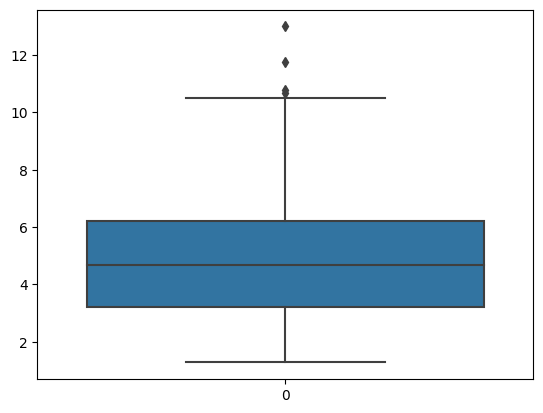

For: Hue


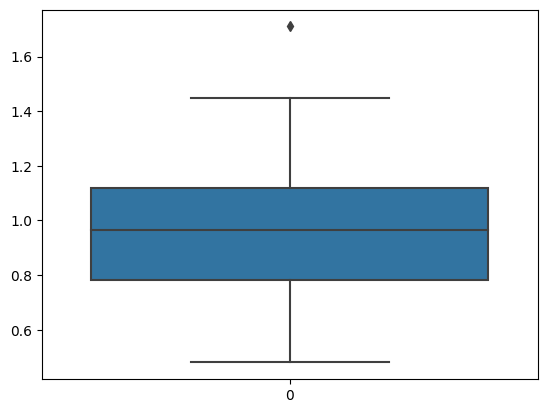

For: Dilution


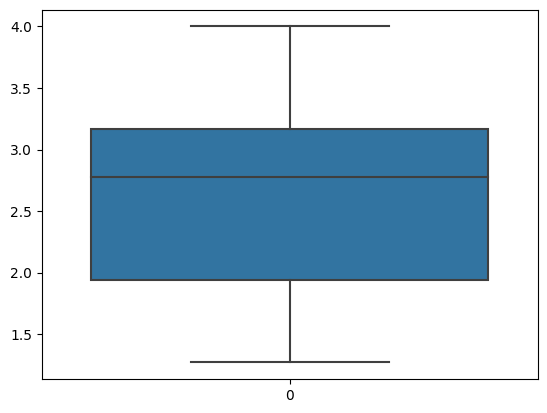

For: Proline


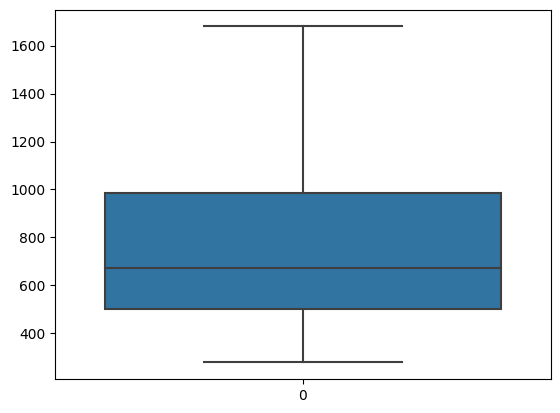

In [ ]:
for i in df.columns:
  print("For:", i)
  sns.boxplot(df[i])
  plt.show()

In [ ]:
Q3 = df['Malic'].quantile(q=0.75)
Q1 = df['Malic'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

a = cap_extreme_values(df['Malic'], down, up)
print(a)
df['Malic'] = a


0      1.7100
1      1.7800
2      2.3600
3      1.9500
4      2.5900
        ...  
173    5.3025
174    3.9100
175    4.2800
176    2.5900
177    4.1000
Name: Malic, Length: 178, dtype: float64


In [ ]:
Q3 = df['Ash'].quantile(q=0.75)
Q1 = df['Ash'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

b = cap_extreme_values(df['Ash'], down, up)
print(a)
df['Ash'] = b

0      1.7100
1      1.7800
2      2.3600
3      1.9500
4      2.5900
        ...  
173    5.3025
174    3.9100
175    4.2800
176    2.5900
177    4.1000
Name: Malic, Length: 178, dtype: float64


In [ ]:
Q3 = df['Alcalinity'].quantile(q=0.75)
Q1 = df['Alcalinity'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

c = cap_extreme_values(df['Alcalinity'], down, up)
print(c)
df['Alcalinity'] = c

0      15.6
1      11.2
2      18.6
3      16.8
4      21.0
       ... 
173    20.5
174    23.0
175    20.0
176    20.0
177    24.5
Name: Alcalinity, Length: 178, dtype: float64


In [ ]:
Q3 = df['Magnesium'].quantile(q=0.75)
Q1 = df['Magnesium'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

d = cap_extreme_values(df['Magnesium'], down, up)
print(c)
df['Magnesium'] =d

0      15.6
1      11.2
2      18.6
3      16.8
4      21.0
       ... 
173    20.5
174    23.0
175    20.0
176    20.0
177    24.5
Name: Alcalinity, Length: 178, dtype: float64


In [ ]:
Q3 = df['Proanthocyanins'].quantile(q=0.75)
Q1 = df['Proanthocyanins'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

e = cap_extreme_values(df['Proanthocyanins'], down, up)
print(c)
df['Proanthocyanins'] = e

0      15.6
1      11.2
2      18.6
3      16.8
4      21.0
       ... 
173    20.5
174    23.0
175    20.0
176    20.0
177    24.5
Name: Alcalinity, Length: 178, dtype: float64


In [ ]:
Q3 = df['Color'].quantile(q=0.75)
Q1 = df['Color'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

f = cap_extreme_values(df['Color'], down, up)
print(c)
df['Color'] = f

0      15.6
1      11.2
2      18.6
3      16.8
4      21.0
       ... 
173    20.5
174    23.0
175    20.0
176    20.0
177    24.5
Name: Alcalinity, Length: 178, dtype: float64


In [ ]:
Q3 = df['Hue'].quantile(q=0.75)
Q1 = df['Hue'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

g = cap_extreme_values(df['Hue'], down, up)
print(c)
df['Hue'] = g

0      15.6
1      11.2
2      18.6
3      16.8
4      21.0
       ... 
173    20.5
174    23.0
175    20.0
176    20.0
177    24.5
Name: Alcalinity, Length: 178, dtype: float64


In [ ]:
Q3 = df['Hue'].quantile(q=0.75)
Q1 = df['Hue'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

g = cap_extreme_values(df['Hue'], down, up)
print(c)
df['Hue'] = g

0      15.6
1      11.2
2      18.6
3      16.8
4      21.0
       ... 
173    20.5
174    23.0
175    20.0
176    20.0
177    24.5
Name: Alcalinity, Length: 178, dtype: float64


For: Type


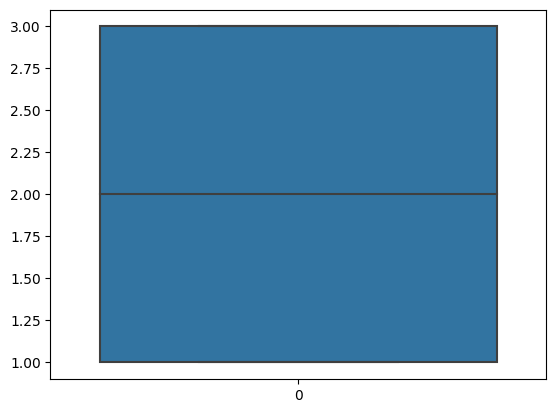

For: Alcohol


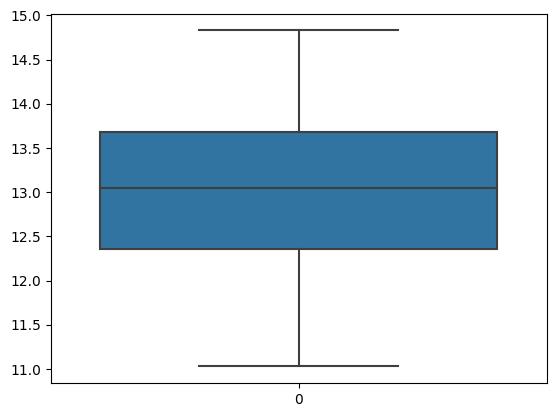

For: Malic


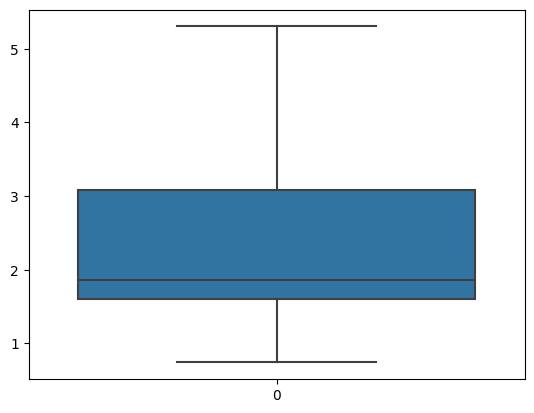

For: Ash


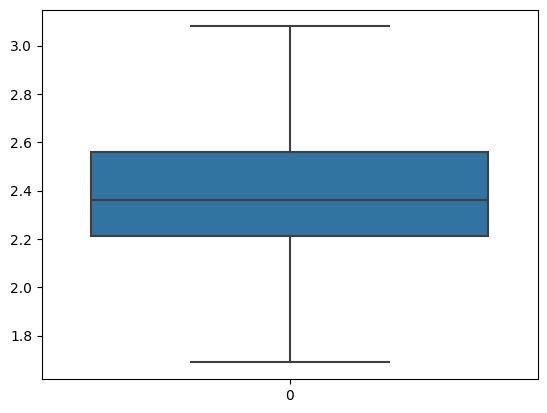

For: Alcalinity


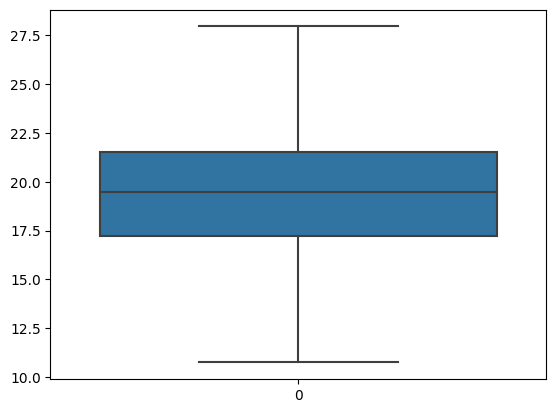

For: Magnesium


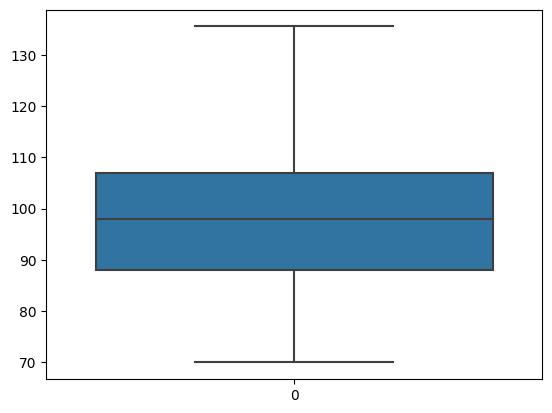

For: Phenols


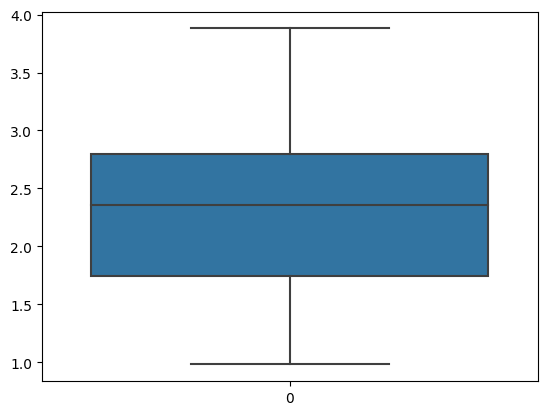

For: Flavanoids


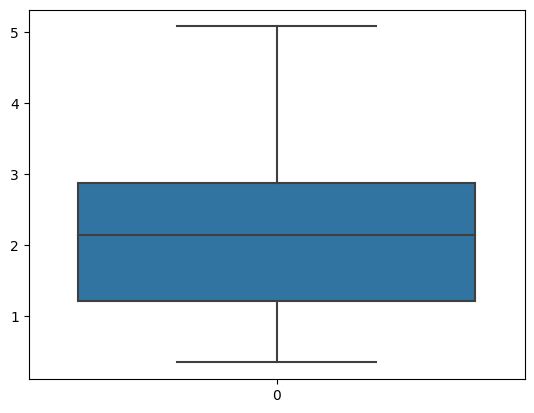

For: Nonflavanoids


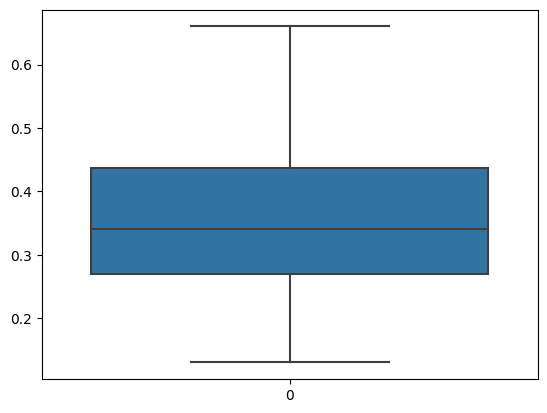

For: Proanthocyanins


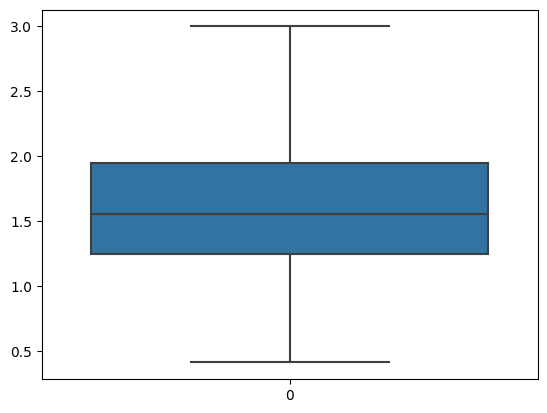

For: Color


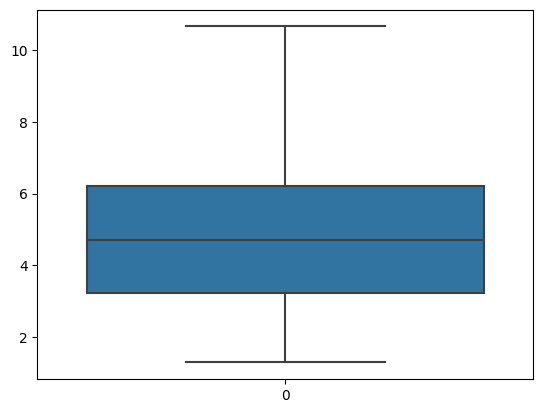

For: Hue


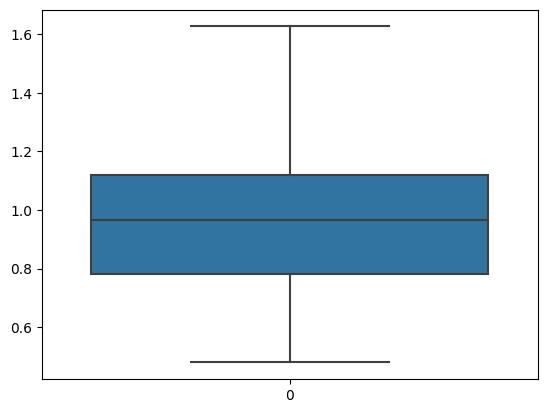

For: Dilution


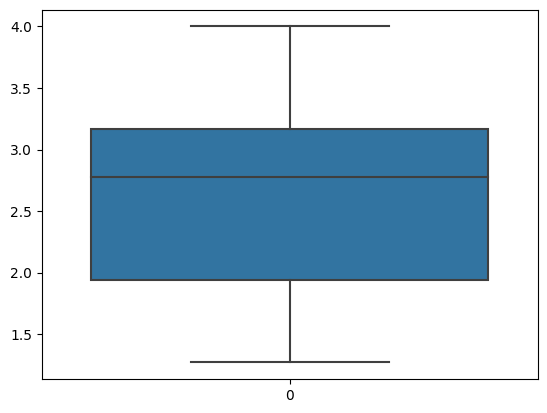

For: Proline


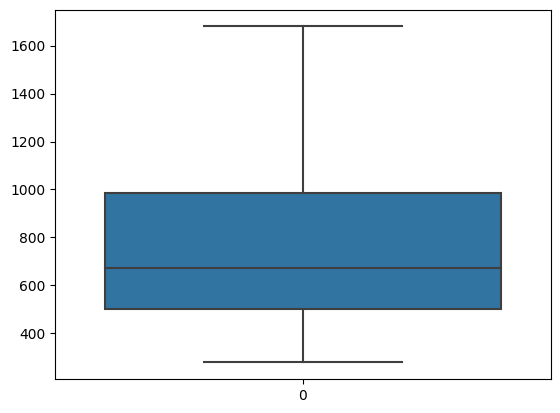

In [ ]:
for i in df.columns:
  print("For:", i)
  sns.boxplot(df[i])
  plt.show()

<Axes: >

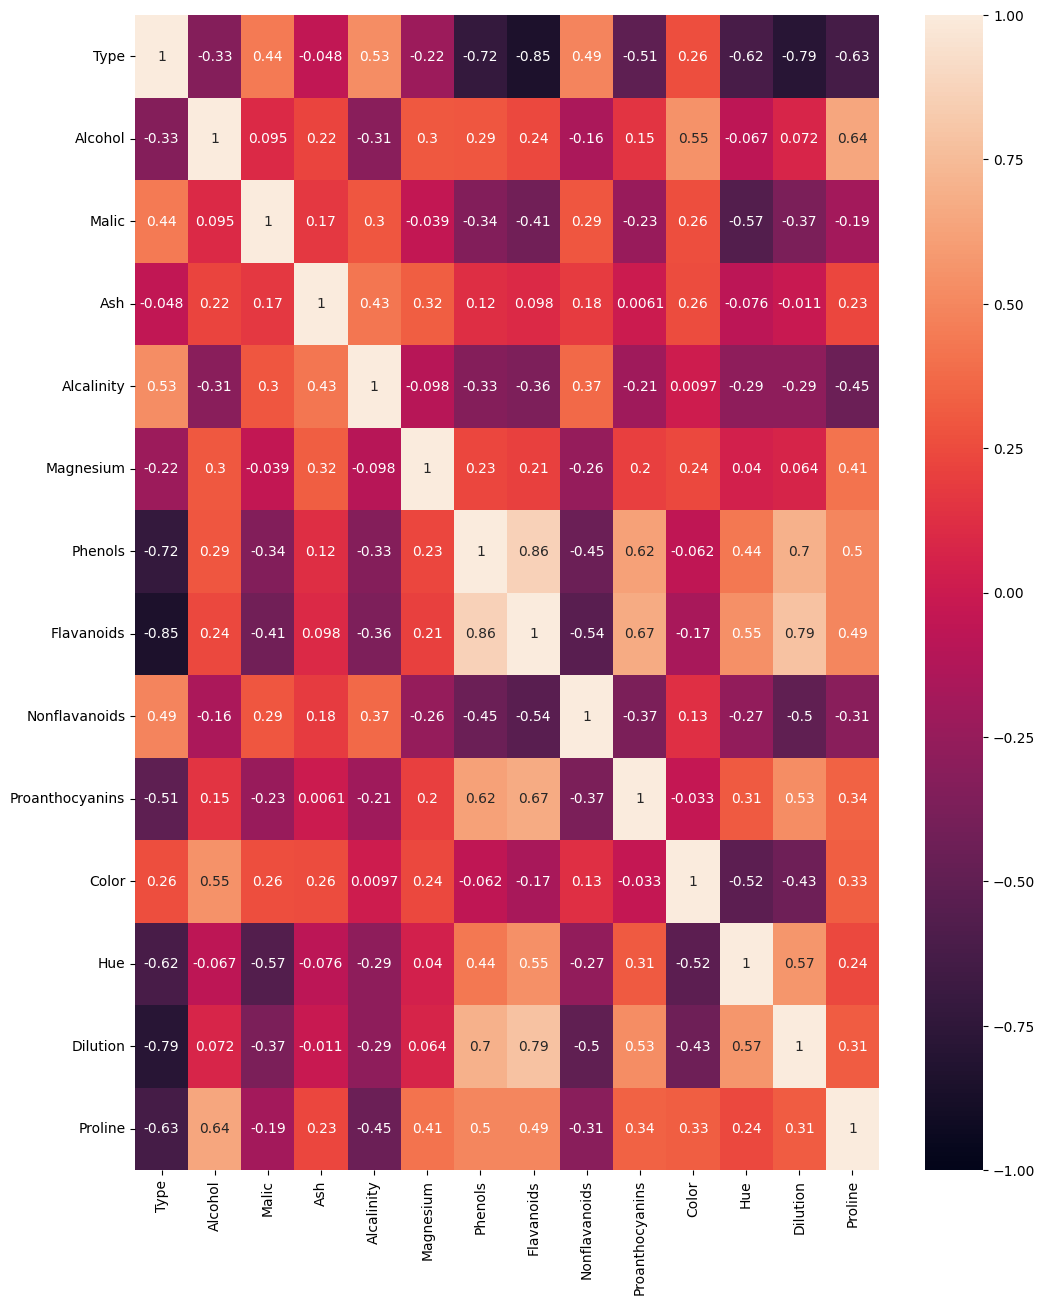

In [ ]:
plt.figure(figsize=(12,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

<Axes: xlabel='Flavanoids', ylabel='Count'>

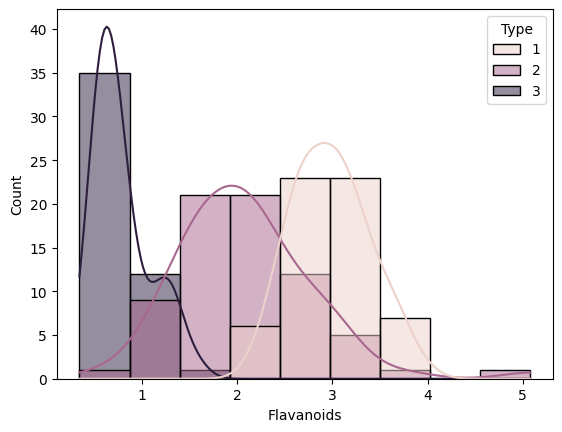

In [ ]:
sns.histplot(data=df, x='Flavanoids', hue='Type', kde=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.multivariate.pca import PCA

In [ ]:
pc = PCA(df, ncomp=2, standardize=True, normalize=True, missing=None, method='eig')

In [ ]:
pc.loadings

,comp_0,comp_1
Type,-0.392510,0.004963
Alcohol,0.137782,0.476899
Malic,-0.223298,0.225418
Ash,0.000984,0.318509
Alcalinity,-0.228836,-0.015382
Magnesium,0.125157,0.326225
Phenols,0.358243,0.061533
Flavanoids,0.389646,-0.004617
Nonflavanoids,-0.265719,0.024891
Proanthocyanins,0.282318,0.032142


In [ ]:
pc.factors

,comp_0,comp_1
0,0.113092,0.071775
1,0.080782,-0.015491
2,0.089107,0.048926
3,0.125230,0.131126
4,0.044954,0.044757
...,...,...
173,-0.113532,0.101638
174,-0.093712,0.084178
175,-0.095872,0.134301
176,-0.086973,0.112223


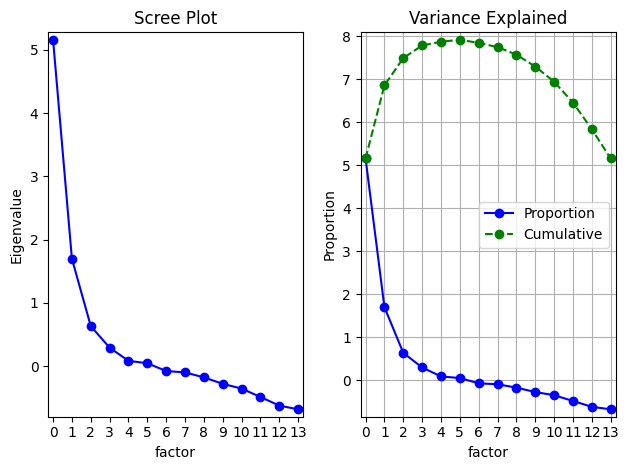

In [ ]:
from statsmodels.multivariate.factor import Factor
model = Factor(df).fit()
model.plot_scree()
plt.grid()
plt.show()

In [ ]:
model = Factor(df).fit()

In [ ]:
num_factors_to_retain = 3

In [ ]:
retained_factors = model.loadings[:, :num_factors_to_retain]

In [ ]:
retained_factors

array([[-0.94386797],
       [ 0.28178656],
       [-0.47153499],
       [ 0.00573126],
       [-0.48139216],
       [ 0.2535525 ],
       [ 0.83290041],
       [ 0.93815032],
       [-0.57242562],
       [ 0.6190704 ],
       [-0.18273284],
       [ 0.60364143],
       [ 0.80655856],
       [ 0.57992679]])

In [ ]:
pip install scipy


In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import FactorAnalysis

In [ ]:
dist = pdist(pc.loadings.T, metric='euclidean')

In [ ]:
distance_matrix = squareform(dist)

In [ ]:
#Hierarchical Clustering

In [ ]:
linkage_matrix = linkage(distance_matrix, method='ward')

<ipython-input-139-227669dc367c>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


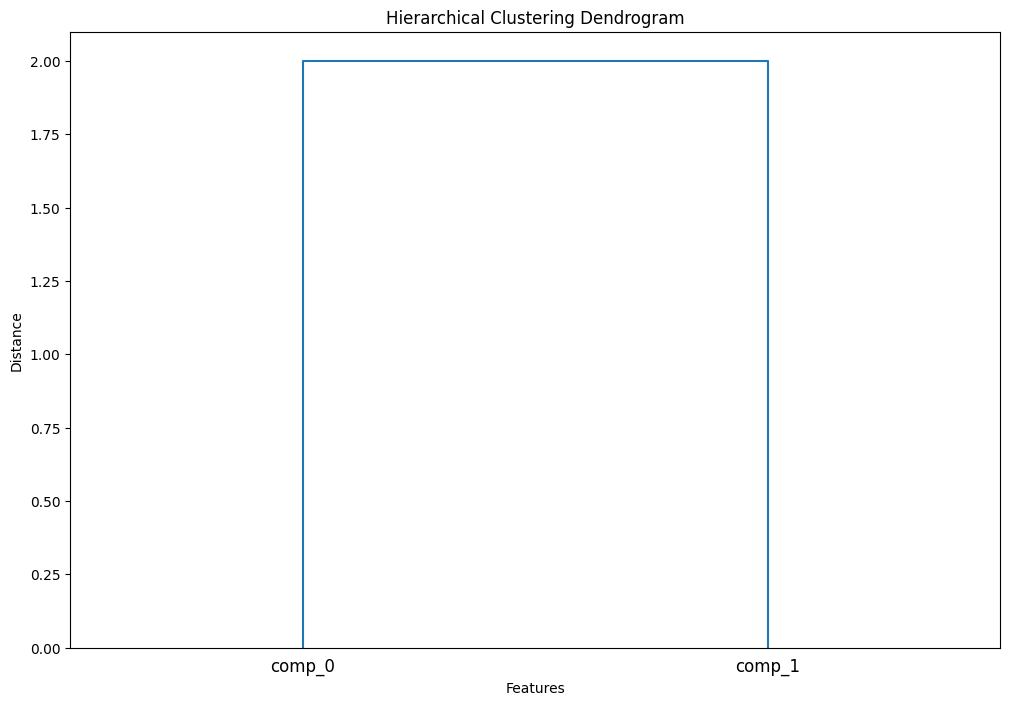

In [ ]:
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=pc.loadings.columns, orientation='top')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [ ]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
factor_analysis = FactorAnalysis(n_components=3)
factor_loadings = factor_analysis.fit_transform(df)

pairwise_distances = pdist(factor_loadings, metric='euclidean')

clusters = linkage(pairwise_distances, method='average')

In [ ]:
cluster_labels = fcluster(clusters, t=3, criterion='maxclust')  # Adjust 't' as needed

# Step 5: Create a new DataFrame with cluster labels and original data
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = cluster_labels

# Step 6: Group data by cluster labels
grouped_data = data_with_clusters.groupby('Cluster')

# Step 7: Calculate the mean or median of each feature for each cluster
cluster_means = grouped_data.mean()

In [ ]:
cluster_means

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Cluster,,,,,,,,,,,,,,
1,1.400000,13.156667,1.970000,2.490500,19.066667,126.733333,2.704000,2.737333,0.298667,2.082667,4.533333,1.065333,3.186667,833.000000
2,2.979592,13.136122,3.287245,2.432449,21.395918,99.387755,1.666939,0.786327,0.445918,1.159796,7.235102,0.687265,1.686327,634.795918
3,1.561404,12.921842,1.966601,2.322182,18.707895,95.938596,2.511316,2.470351,0.334035,1.703947,4.160263,1.058651,2.933772,783.745614


#After looking at all these 3 clusters, we realize that, Cluster 1 contain combinations which has max amount of Alcohol, Ash, Magnesium, Phenols, Proanthocyanins and hue, whereas Cluster 2 has max amount of Malic, Alcalinity, Nonflavanoids and Color. Cluster 3 has the least amount of everything.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
sc = StandardScaler()
scaled_data = sc.fit_transform(df)

In [ ]:
pca = PCA(n_components = 2)
pc = pca.fit_transform(scaled_data)

In [ ]:
clust = 3
kmeans = KMeans(n_clusters=clust)
kmeans.fit(pc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
df['Clusters'] = kmeans.labels_

In [ ]:
df.groupby('Clusters').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clusters,,,,,,,,,,,,,,
0,2.979592,13.151633,3.333163,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.270816,0.685918,1.690204,627.551020
1,1.048387,13.676774,1.997903,2.461573,17.420968,107.483871,2.847581,3.003226,0.292097,1.917581,5.453548,1.065484,3.163387,1100.225806
2,2.000000,12.264478,1.904813,2.229235,19.947761,92.417910,2.235075,2.028507,0.361343,1.588657,3.020896,1.054810,2.775075,507.208955


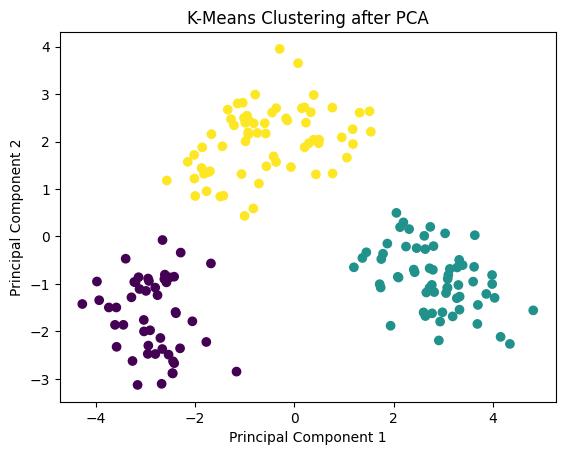

In [ ]:
plt.scatter(pc[:, 0], pc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#Looking at the above clusters, we can say that every cluster differentiates from the other cluster quite well. The clusters made with Kmeans are also similarly classified as that of the clusters made with hierarchical clustering